##4.2 - Sentiment text classification using keras with LSTM

In [704]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Mentoria-Financiera-DiploDatos/Entrega3/master/sentimientos/data/feeling_procesado.csv")
print(df.news.size)
df.head(3)

4838


,Unnamed: 0,feeling,news,news_tokens,news_tokens_tagged
0,0,neutral,"According to Gran , the company has no plans t...","['accord', 'gran', 'company', 'plan', 'move', ...","[('accord', 'NN'), ('gran', 'VBD'), ('company'..."
1,1,neutral,Technopolis plans to develop in stages an area...,"['technopolis', 'plan', 'develop', 'stage', 'a...","[('technopolis', 'NN'), ('plan', 'NN'), ('deve..."
2,2,negative,The international electronic industry company ...,"['international', 'electronic', 'industry', 'c...","[('international', 'JJ'), ('electronic', 'JJ')..."


A continuación generamos una columna `news_tokens_str` que tiene las noticias con el texto preprocesado pero en string para luego cargarlas de esta forma que resulta conveniente.

In [705]:
df.news_tokens.values[0].split()[0].replace("[", '').replace("]", '').replace("'", '').replace(",", '')

'accord'

In [706]:
df['news_tokens_str'] = df.news
for i in range(df.news_tokens.size):
    temp_list = df.news_tokens[i].split()
    temp_str = ""
    for j in temp_list:
        temp_str += j.replace("[", '').replace("]", '').replace("'", '').replace(",", ' ')
    df.news_tokens_str.values[i] = temp_str

In [707]:
df.head(3)

,Unnamed: 0,feeling,news,news_tokens,news_tokens_tagged,news_tokens_str
0,0,neutral,"According to Gran , the company has no plans t...","['accord', 'gran', 'company', 'plan', 'move', ...","[('accord', 'NN'), ('gran', 'VBD'), ('company'...",accord gran company plan move production russi...
1,1,neutral,Technopolis plans to develop in stages an area...,"['technopolis', 'plan', 'develop', 'stage', 'a...","[('technopolis', 'NN'), ('plan', 'NN'), ('deve...",technopolis plan develop stage area le square ...
2,2,negative,The international electronic industry company ...,"['international', 'electronic', 'industry', 'c...","[('international', 'JJ'), ('electronic', 'JJ')...",international electronic industry company elco...


In [708]:
# Select relavant columns
news_df = df[['news_tokens_str','feeling']]
news_df.head(10)

,news_tokens_str,feeling
0,accord gran company plan move production russi...,neutral
1,technopolis plan develop stage area le square ...,neutral
2,international electronic industry company elco...,negative
3,new production plant company would increase ca...,positive
4,accord company update strategy year basware ta...,positive
5,finance aspocomp growth aspocomp aggressively ...,positive
6,last quarter componenta net sale double eurm e...,positive
7,third quarter net sale increase eur mn operate...,positive
8,operate profit rise eur mn eur mn correspond p...,positive
9,operate profit total eur mn eur mn represent n...,positive


Se desordena el dataset de forma aleatoria con la función sample, ya que observamos que los sentimientos de las noticias se encuentran muy agrupados y esto vimos que luego afecta negativamente a la hora de entrenar el modelo.

In [709]:
# No tenemos en cuenta las noticias etiquetadas como neutrales
news_df = news_df[news_df['feeling'] != 'neutral'].reset_index(drop=True)

# Mezclamos con sample ya que los sentimientos están bastante agrupados en el
#  dataset y esto genera problemas luego a la hora de entrenar el modelo.
news_df = news_df.sample(frac=1).reset_index(drop=True)
print(news_df.feeling.size)
news_df.head(10)

1966


,news_tokens_str,feeling
0,close omx helsinki pct low point omx helsinki ...,negative
1,finnish silicon wafer manufacturer okmetic oyj...,positive
2,separate side business able fast expand develo...,positive
3,operate profit decrease eur mn eur mn,negative
4,beyond improve voice capability customer strea...,positive
5,raisio division record operate profit,positive
6,shop center prime location right next myllypur...,positive
7,eps improve eur eur,positive
8,poyry recognize one world lead advisor global ...,positive
9,metal gain percent year demand china world lar...,positive


In [710]:
# Convert feeling to numeric
sentiment_label = news_df.feeling.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['negative', 'positive'], dtype='object'))

Utilizamos un maxlen de 40 ya que con los textos preprocesados la noticia con más palabras tiene 38 palabras.

In [711]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

news = news_df.news_tokens_str.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(news)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(news)
padded_sequence = pad_sequences(encoded_docs, maxlen=40)

In [712]:
print(vocab_size)
# 4082 palabras con las noticias preprocesadas
# 5535 palabras con las noticias sin el preprocesado

4082


In [713]:
print(tokenizer.word_index)

{'eur': 1, 'mn': 2, 'company': 3, 'profit': 4, 'say': 5, 'sale': 6, 'net': 7, 'finnish': 8, 'million': 9, 'year': 10, 'period': 11, 'operate': 12, 'mln': 13, 'quarter': 14, 'increase': 15, 'oyj': 16, 'loss': 17, 'euro': 18, 'compare': 19, 'group': 20, 'share': 21, 'first': 22, 'total': 23, 'finland': 24, 'rise': 25, 'market': 26, 'service': 27, 'correspond': 28, 'today': 29, 'new': 30, 'percent': 31, 'contract': 32, 'decrease': 33, 'business': 34, 'also': 35, 'hel': 36, 'order': 37, 'result': 38, 'operation': 39, 'per': 40, 'solution': 41, 'technology': 42, 'report': 43, 'early': 44, 'helsinki': 45, 'month': 46, 'expect': 47, 'agreement': 48, 'product': 49, 'sign': 50, 'bank': 51, 'eurm': 52, 'pct': 53, 'third': 54, 'maker': 55, 'system': 56, 'last': 57, 'u': 58, 'price': 59, 'omx': 60, 'usd': 61, 'second': 62, 'grow': 63, 'estimate': 64, 'customer': 65, 'fell': 66, 'nokia': 67, 'low': 68, 'mobile': 69, 'corporation': 70, 'growth': 71, 'financial': 72, 'cost': 73, 'earn': 74, 'plant': 

In [714]:
print(news[0])
print(encoded_docs[0])

close omx helsinki pct low point omx helsinki pct point bln eur turnover
[150, 60, 45, 53, 68, 220, 60, 45, 53, 220, 668, 1, 205]


In [715]:
print(padded_sequence[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 150  60  45  53  68 220  60  45  53
 220 668   1 205]


In [716]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=40) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 


Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 40, 32)            130624    
_________________________________________________________________
spatial_dropout1d_35 (Spatia (None, 40, 32)            0         
_________________________________________________________________
lstm_35 (LSTM)               (None, 50)                16600     
_________________________________________________________________
dropout_35 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 51        
Total params: 147,275
Trainable params: 147,275
Non-trainable params: 0
_________________________________________________________________
None


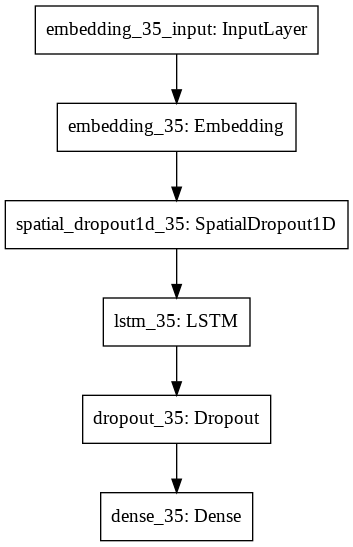

In [717]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [718]:
# Entrenamos el modelo
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=8, batch_size=32)

Epoch 1/8
50/50 [==============================] - 7s 63ms/step - loss: 0.6343 - accuracy: 0.6927 - val_loss: 0.6336 - val_accuracy: 0.6675
Epoch 2/8
50/50 [==============================] - 3s 57ms/step - loss: 0.5965 - accuracy: 0.6991 - val_loss: 0.6008 - val_accuracy: 0.6675
Epoch 3/8
50/50 [==============================] - 3s 57ms/step - loss: 0.5082 - accuracy: 0.7430 - val_loss: 0.4439 - val_accuracy: 0.7868
Epoch 4/8
50/50 [==============================] - 3s 57ms/step - loss: 0.3261 - accuracy: 0.8696 - val_loss: 0.3566 - val_accuracy: 0.8401
Epoch 5/8
50/50 [==============================] - 3s 55ms/step - loss: 0.2473 - accuracy: 0.9090 - val_loss: 0.3353 - val_accuracy: 0.8579
Epoch 6/8
50/50 [==============================] - 3s 56ms/step - loss: 0.1957 - accuracy: 0.9268 - val_loss: 0.3135 - val_accuracy: 0.8706
Epoch 7/8
50/50 [==============================] - 3s 57ms/step - loss: 0.1544 - accuracy: 0.9389 - val_loss: 0.3277 - val_accuracy: 0.8756
Epoch 8/8
50/50 [===

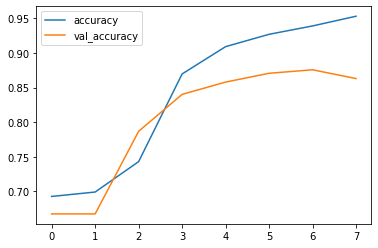

In [719]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

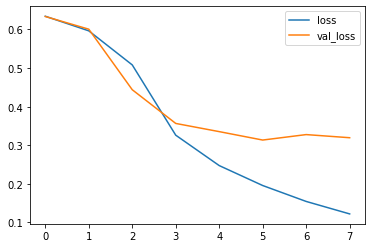

In [720]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [721]:
test_word ="This is bad, negative, a tax, horrible. Please classify me as negative!"
tw = tokenizer.texts_to_sequences([test_word])
tw

[[3287, 246, 185, 392, 246]]

In [722]:
tw = pad_sequences(tw, maxlen=40)
tw

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 3287,  246,  185,  392,  246]], dtype=int32)

In [723]:
prediction = int(model.predict(tw).round().item())

In [724]:
sentiment_label[1][prediction]

'negative'

##Conclusión

El modelo resultante obtenido usando redes neuronales con keras es significativamente mejor que el obtenido con los algoritmos más básicos y simples de ML que utilizamos en la entrega 3.

**Enlace de referencia:**

Práctico: https://medium.datadriveninvestor.com/deep-learning-lstm-for-sentiment-analysis-in-tensorflow-with-keras-api-92e62cde7626

Explicación LSTM: https://medium.com/mlearning-ai/sentiment-analysis-using-lstm-21767a130857
